> Welcome to the Investigate a Dataset project!

# Project: Investigate No Show Medical Appointment  in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> The data is downloaded from Kaggle and it is free to download. It contains 110,527 records and has 14 columns that might help to determine the factors to predict if a patient will most likely no show on a medical appointment. 

> Data Source: https://www.kaggle.com/joniarroba/noshowappointments


In [1]:
#import the packages needed for this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This section of the report, will outline the code to inspect the data, understand the structure, check for data cleanliness, and figure out any changes we have to make.

### General Properties

This section describes the overall structure of the csv file.

**Data Dictionary:**

PatientId: ID number of a patient

AppointmentID: ID number of an appointment

Gender: contains Male or Female

ScheduledDay: Date when the appointment was scheduled

AppointmentDay: Date of appointment

Age: Patient's age

Neighbourhood: Location of the hospital

Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 0= False 1=True

Hipertension: indicates whether the patient has hypertension condition. 0= False 1=True

Diabetes: indicate whether the patient has diabetes condition. 0= False 1=True

Alcoholism: indicate whether the patient suffer from Alcoholism. 0= False 1=True

Handcap: Indicates the number of all disability conditions

SMS_received: 1 or more messages sent to the patient.

No-show: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.        

In [2]:
#read the dataset. The dataset (csv file) was uploaded to the files section
df = pd.read_csv('brazildata.csv')

In [3]:
#View the data from top rows of the frame
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#view the dataframe dimensions, shows the number of records and columns
df.shape

(110527, 14)

The data shows that there 110,527 records and 14 columns

In [5]:
#view the dataframe descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The data shows statistical information of columns with numeric values.
Overall mean age is 37yo, 50% of the patients are also about 37yo and 75% shows between 0 and 55yo. 
Also, other attributes are showing 1 or 0

In [6]:
#This shows information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data shows that each column has 110,527 non-null values, which demonstrate that the data is clean and doesn't need much data cleaning actions.

### Data Cleaning

> This section of the report, will outline the code to clean the data and understand the completeness of each column. 


In [7]:
#First step of cleaning is to drop columns not needed for analysis. I will drop PatientID as i will not need to
#analyze that column. But i will leave the appointmentID to help me in peforming counts function.
df.drop(['PatientId'],axis=1,inplace=True)

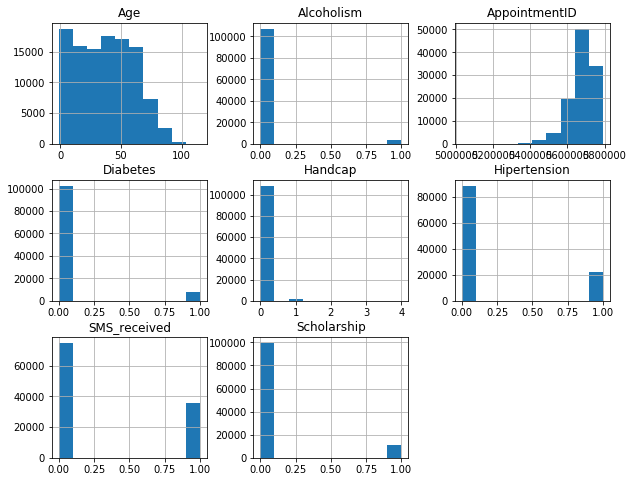

In [8]:
#Next step is to display histogram, to see how data are distributed and see if there are missing or null value
df.hist(figsize=(10,8));

The histogram shows or confirms the initial observation that about 75% shows between 0 and 55yo. Other attributes are showing 1 or 0

In [9]:
#Since the data is clean and doesn't need a lot of transformation, 
#the last step of cleaning is just to rename column "No-Show", just to make sure that "-" doesn't cause any syntax error
df.rename(columns={'No-show': 'NoShow'}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> The approach in analyzing the data is to investigate whether internal or external factors affects the patient's action. Internal factors means, patient's profile like Age, Gender, Enrollment to welfare, Health Condition, Physical Condition. External factors include Hospital Location and SMS reminders.  

### Question 1: Investigate if patient's profile is a determining factor if patient will not show up in medical appointment.

In [10]:
#First step is to check how many did not show up to the medical appointment
df.groupby(["NoShow"]).size()/len(df)

NoShow
No     0.798067
Yes    0.201933
dtype: float64

Text(0.5, 0, 'No Show %')

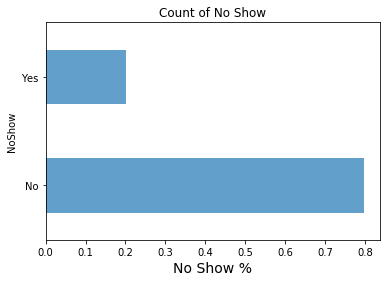

In [11]:
#visual representation of how many showed and did not show to medical appointment
countns = df.groupby(["NoShow"]).size()/len(df)
countns.plot(kind='barh', title='Count of No Show', alpha=.7)
plt.xlabel('No Show %', fontsize=14)

The data shows that 20% of patients did not show to scheduled medical appointment

In [12]:
#Next step is to investigate overall average age
df.Age.mean()

37.08887421173107

In [13]:
#Next step is to investigate the average of patients who did not show 
df.groupby('NoShow').Age.mean()

NoShow
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

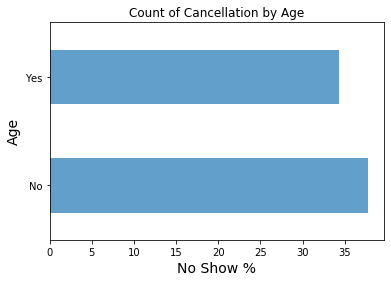

In [14]:
#visual representation of patient's age and no-show 
counta = df.groupby('NoShow').Age.mean()
counta.plot(kind='barh', title='Count of Cancellation by Age', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Age', fontsize=14)

No-show means ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
The average age of patients who did not show is 34yo, while the overall average of patients is 37yo. 3years difference is not a significant indicator if a patient will show up to the scheduled appointment.

In [15]:
#Next step is to investigate if gender is an indicative factor
#check breakdown of gender
df.groupby(["Gender"]).count()['AppointmentID']/len(df)

Gender
F    0.649977
M    0.350023
Name: AppointmentID, dtype: float64

In [16]:
#Note that i used AppointmentID column to count the records.
#I also computed for percentage
df.groupby(["NoShow","Gender"]).count()['AppointmentID']/len(df)

NoShow  Gender
No      F         0.517937
        M         0.280131
Yes     F         0.132040
        M         0.069892
Name: AppointmentID, dtype: float64

In [17]:
#I switched the columns, because the data reads better from the attribute's (gender) point of view
df.groupby(["Gender","NoShow"]).count()['AppointmentID']/len(df)

Gender  NoShow
F       No        0.517937
        Yes       0.132040
M       No        0.280131
        Yes       0.069892
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'Gender')

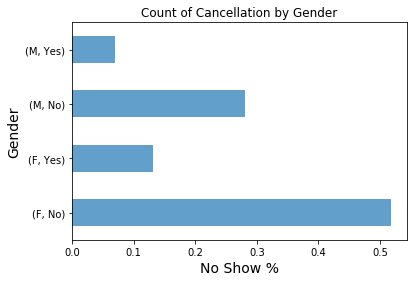

In [18]:
#visual representation of patient's gender and no-show 
countf = df.groupby(["Gender","NoShow"]).count()['AppointmentID']/len(df)
countf.plot(kind='barh', title='Count of Cancellation by Gender', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Gender', fontsize=14)

Data indicates that higher percentage of women than men do not show up to their appointment 

In [19]:
#Next step is to investigate if a patient is enrolled to welfare program called Bolsa Familia is an indicative factor
df.groupby(["Scholarship","NoShow"]).count()['AppointmentID']/len(df)

Scholarship  NoShow
0            No        0.723126
             Yes       0.178608
1            No        0.074941
             Yes       0.023325
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'Welfare Enrolment')

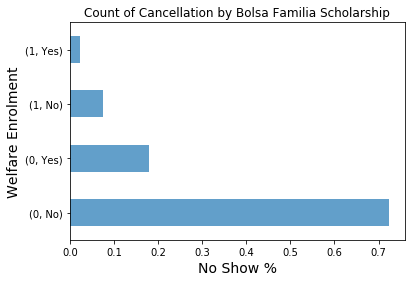

In [20]:
#visual representation of patient's welfare program enrollment and no-show 
counts = df.groupby(['Scholarship','NoShow']).count()['AppointmentID']/len(df)
counts.plot(kind='barh', title='Count of Cancellation by Bolsa Familia Scholarship', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Welfare Enrolment', fontsize=14)

Data indicates that patients who are not enrolled to Bolsa Familia welfare program are more likely not to show to their appointment than those who are enrolled.

In [21]:
#Check if Alcoholism influences patient's action not to show up to medical appointment
df.groupby(['Alcoholism','NoShow']).count()['AppointmentID']/len(df)

Alcoholism  NoShow
0           No        0.773793
            Yes       0.195807
1           No        0.024275
            Yes       0.006125
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'Alcoholism Profile')

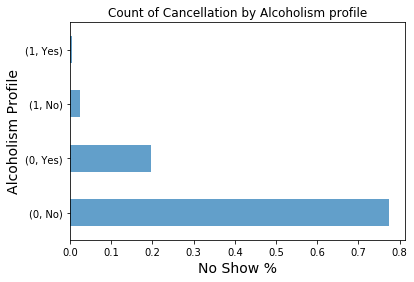

In [22]:
#visual representation of patient's alcoholism and no-show 
countal = df.groupby(['Alcoholism','NoShow']).count()['AppointmentID']/len(df)
countal.plot(kind='barh', title='Count of Cancellation by Alcoholism profile', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Alcoholism Profile', fontsize=14)

Alcoholism is not a significant factor that affects patient's decision to show up.

In [23]:
#check if patient's Hypertension condition affects decision
df.groupby(['Hipertension','NoShow']).count()['AppointmentID']/len(df)

Hipertension  NoShow
0             No        0.634949
              Yes       0.167805
1             No        0.163119
              Yes       0.034127
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'Hypertension Condition')

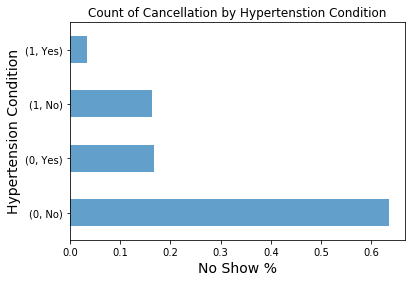

In [24]:
#visual representation of patient's hypertension and no-show 
counth = df.groupby(['Hipertension','NoShow']).count()['AppointmentID']/len(df)
counth.plot(kind='barh', title='Count of Cancellation by Hypertenstion Condition', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Hypertension Condition', fontsize=14)

Patients without Hypertension condition are most likely not to show to appointment, than those who are with Hypertension condition.

In [25]:
#check if patient's Diabetic condition affects decision
df.groupby(['Diabetes','NoShow']).count()['AppointmentID']/len(df)

Diabetes  NoShow
0         No        0.739141
          Yes       0.188995
1         No        0.058927
          Yes       0.012938
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'Diabetes Condition')

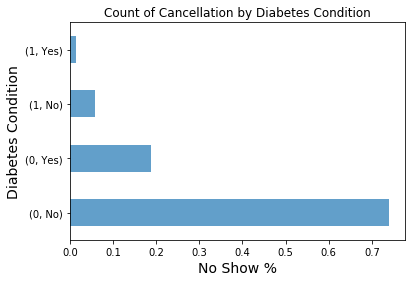

In [26]:
#visual representation of patient's diabetic condition and no-show 
countd = df.groupby(['Diabetes','NoShow']).count()['AppointmentID']/len(df)
countd.plot(kind='barh', title='Count of Cancellation by Diabetes Condition', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Diabetes Condition', fontsize=14)

Patients without Diabetic condition are most likely not to show to appointment, than those who are with Diabetic condition.

In [27]:
#check if patient's disability affects decision
df.groupby(['Handcap','NoShow']).count()['AppointmentID']/len(df)

Handcap  NoShow
0        No        0.781474
         Yes       0.198250
1        No        0.015164
         Yes       0.003311
2        No        0.001321
         Yes       0.000335
3        No        0.000090
         Yes       0.000027
4        No        0.000018
         Yes       0.000009
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'Disability Condition')

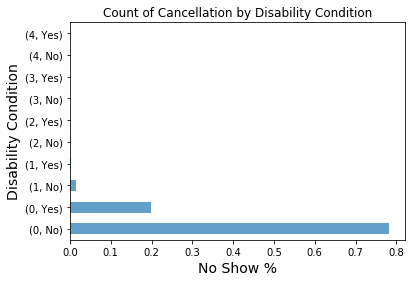

In [28]:
#visual representation of patient's disability and no-show 
countda = df.groupby(['Handcap','NoShow']).count()['AppointmentID']/len(df)
countda.plot(kind='barh', title='Count of Cancellation by Disability Condition', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Disability Condition', fontsize=14)

Handcap: Indicates the number of all disability conditions
Patients without disability shows are most likely not to show to appointment than those with disabilities.

### Question 2: Investigate if external factors affects patient's decision not show up to medical appointment.

In [29]:
#check if number of sms notification determine if patient will show up
df.groupby(['SMS_received','NoShow']).count()['AppointmentID']/len(df)

SMS_received  NoShow
0             No        0.565563
              Yes       0.113411
1             No        0.232504
              Yes       0.088521
Name: AppointmentID, dtype: float64

Text(0, 0.5, 'SMS Notification Received')

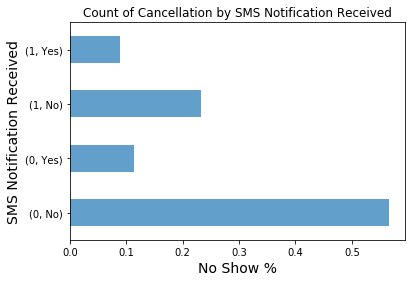

In [30]:
#visual representation of patient's disability and no-show 
countdsms = df.groupby(['SMS_received','NoShow']).count()['AppointmentID']/len(df)
countdsms.plot(kind='barh', title='Count of Cancellation by SMS Notification Received', alpha=.7)
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('SMS Notification Received', fontsize=14)

Patients who received SMS notification as an appointment reminder are most likely not to miss the appointment. However, of those who did not show up to their appointment, there is no huge difference between the patients who received SMS notification and those who did not received a notification.

In [31]:
#check if hospital location is a factor 
df.groupby(["Neighbourhood","NoShow"]).count()['AppointmentID']/len(df)

Neighbourhood    NoShow
AEROPORTO        No        0.000063
                 Yes       0.000009
ANDORINHAS       No        0.015752
                 Yes       0.004714
ANTÔNIO HONÓRIO  No        0.002000
                             ...   
TABUAZEIRO       Yes       0.005184
UNIVERSITÁRIO    No        0.001086
                 Yes       0.000290
VILA RUBIM       No        0.006424
                 Yes       0.001276
Name: AppointmentID, Length: 160, dtype: float64

Text(0, 0.5, 'Neigborhood')

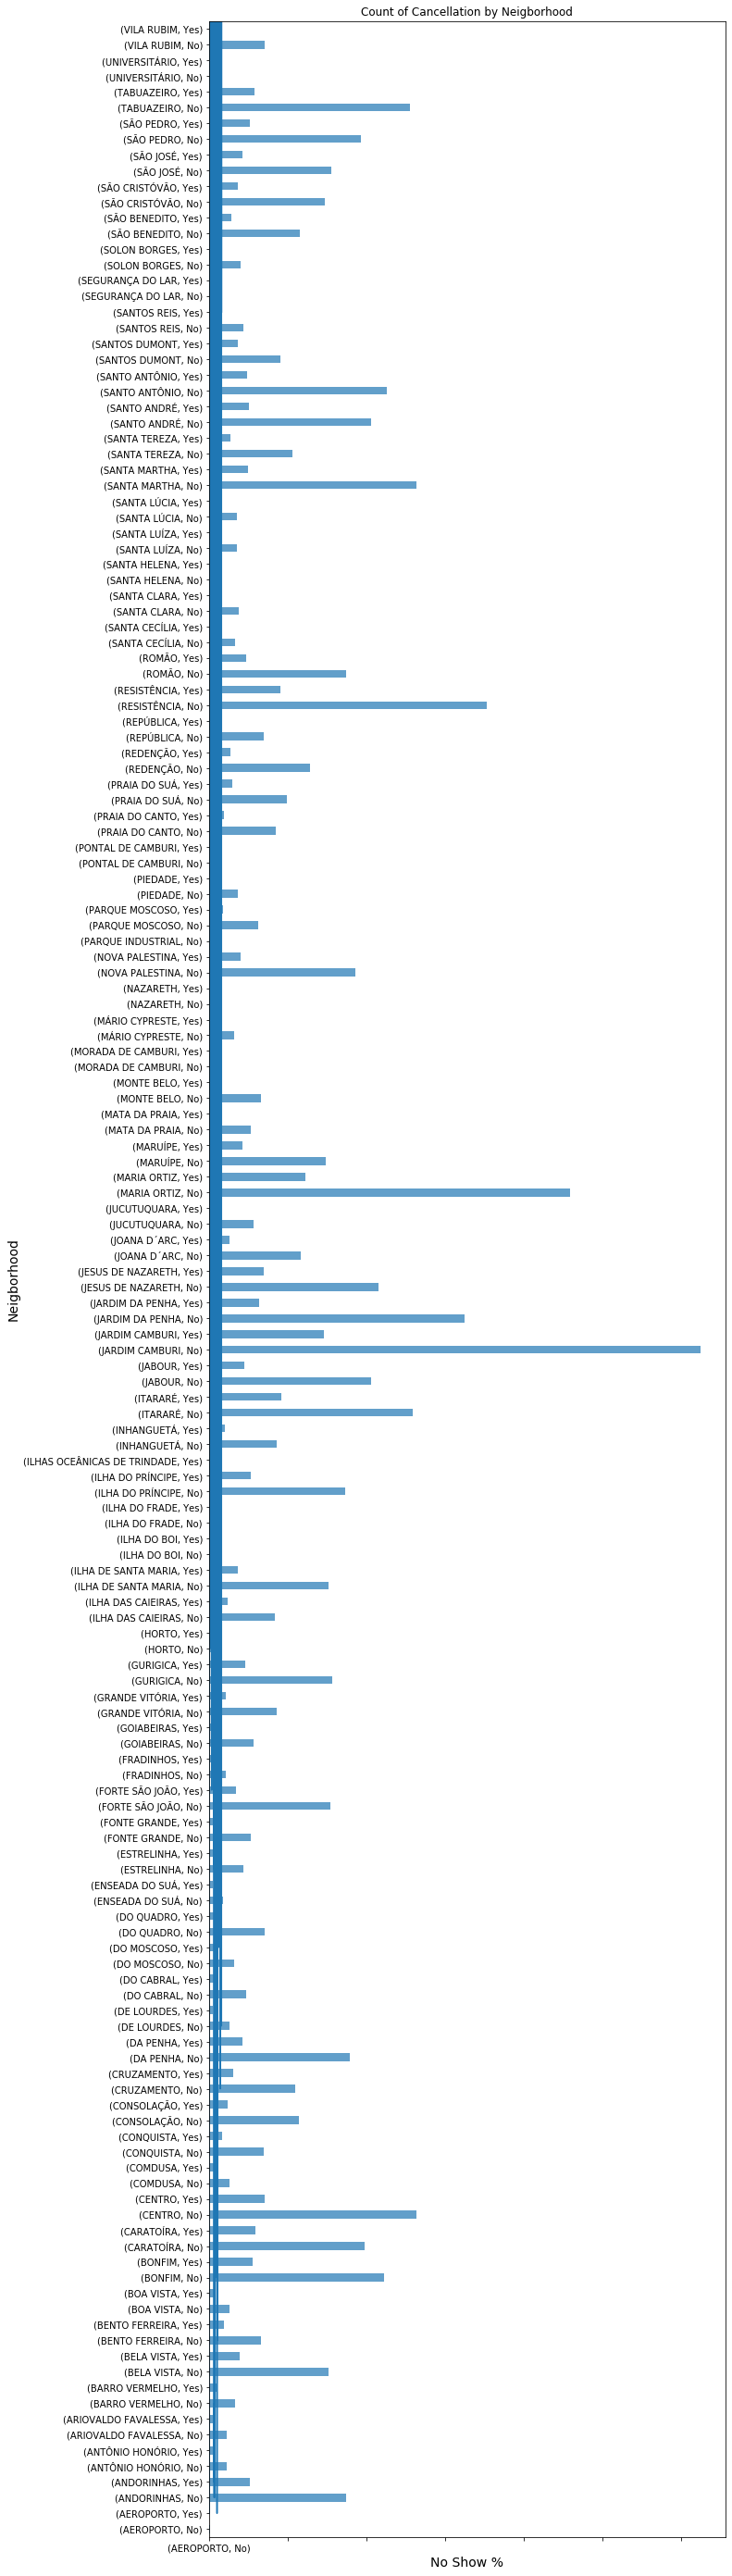

In [32]:
countloc = df.groupby(["Neighbourhood","NoShow"]).count()['AppointmentID']
countloc.plot(kind='barh', title='Count of Cancellation by Neigborhood', alpha=.7)
countloc.plot(figsize=(10,50))
plt.xlabel('No Show %', fontsize=14)
plt.ylabel('Neigborhood', fontsize=14)

In [33]:
no_shows = df.query('NoShow == "Yes"').groupby("Neighbourhood").NoShow.count()
no_shows.sort_values(ascending=False, inplace=True)

Text(0, 0.5, 'Number of appointments')

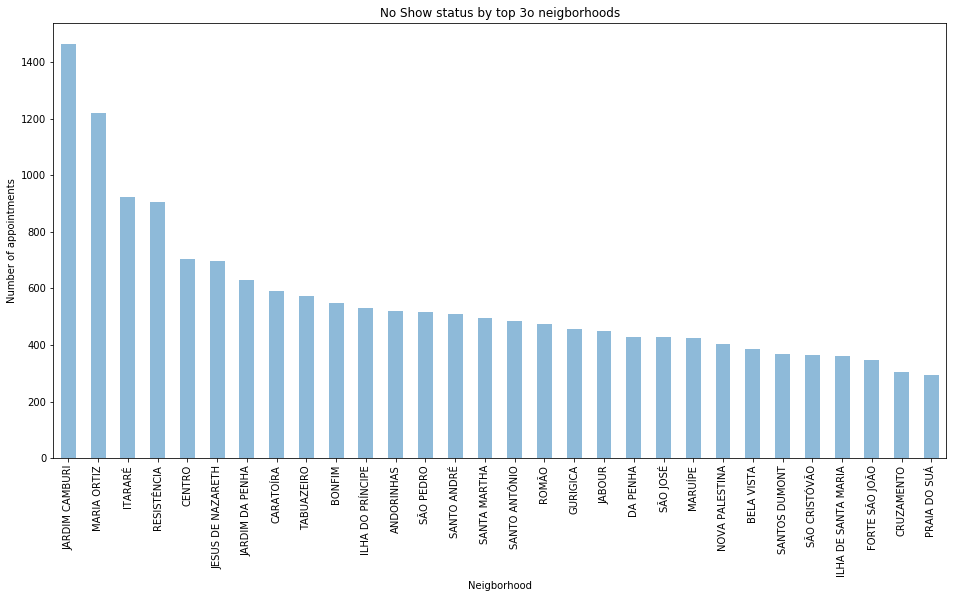

In [35]:
#plotting the data of top30 neigborhoods
values = no_shows[:30]
labels = no_shows.index[:30]
values.plot(kind='bar', x=labels, figsize=(16,8), alpha=0.5)
plt.title("No Show status by top 3o neigborhoods")
plt.xlabel("Neigborhood")
plt.ylabel("Number of appointments")

Data shows that location of hospital is significant indicator if a patient is showing or not going to show up to medical appoitnment. Neighborhood or distance maybe a significant factor. However, there is no data available for distance from patient's location. 

<a id='conclusions'></a>
## Conclusions

> In this analysis, I investigated whether internal or external factors affects the patient's action or decision not to show up to their medical appointment. Internal factors means, patient's profile like Age, Gender, Enrollment to welfare, Health Condition, Physical Condition. External factors include Hospital Location and SMS reminders. The data used for this analysis is downloaded from Kaggle and it is free to download. It contains 110,527 records and has 14 attributes that helped to analyze the factors to predict if a patient will most likely no show on a medical appointment.

> Data shows that patient's profile such as age, gender, medical condition or even disability are not factor or indicative if patient is going to show up to medical appointment. However, external factors like SMS notification and Hospital's location seem to have an effect in patient's action.

> Patients who received SMS notification as an appointment reminder are most likely not to miss the appointment. However, of those who did not show up to their appointment, there is no huge difference between the patients who received SMS notification and those who did not received a notification. Data shows that location of hospital is significant indicator if a patient is showing or not going to show up to medical appoitnment. Neighborhood or distance maybe a significant factor. However, there is no data available for distance from patient's location. 

## Submitting the Project 

> Before submitting the project, I created a .html or .pdf version of this notebook in the workspace here. 

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0